In [2]:
import cv2
import numpy
from matplotlib import pyplot as plt 

def hole_filling_filter(mat: numpy.ndarray):
    for y in range(mat.shape[0]):
        for x in range(mat.shape[1]-2, -1, -1):
            if mat[y,x] == 0:
                mat[y,x] = mat[y,x+1]
    
    return mat

w = 424
h = 240
pov = 84

delay_per_mm = .25/1000

maxdepth = 5000

array = numpy.fromfile("C:\\Users\\theod\\source\\repos\\thesis\\r-tests\\hallway1_Depth.raw", numpy.int16)
array = numpy.reshape(array, [h, w])
array = cv2.medianBlur(array, 5)
array = hole_filling_filter(array)

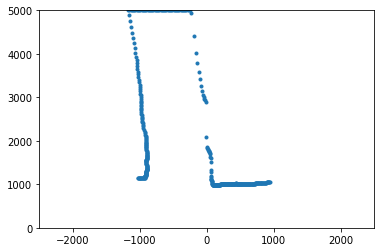

In [27]:
z = array[int(h/2)]

thetas = numpy.linspace(-pov/2, pov/2, w)
rads = thetas * numpy.pi / 180

x = z * numpy.tan(rads) 
d = z / numpy.cos(rads)

d[d>maxdepth] = maxdepth

plt.plot(x, z, '.')
plt.axis([-2500, 2500, 0, 5000])
plt.show()

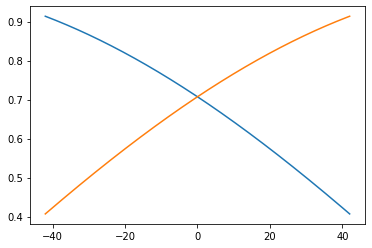

In [3]:
left_power = numpy.sqrt(2)/2*(numpy.cos(rads/2) - numpy.sin(rads/2))
right_power = numpy.sqrt(2)/2*(numpy.sin(rads/2) + numpy.cos(rads/2))
plt.plot(thetas, left_power)
plt.plot(thetas, right_power)
plt.show()

In [84]:
delays = d*delay_per_mm
jitter_amount = 0.05

delays = delays * ((1-jitter_amount) + jitter_amount * numpy.random.random(w))

array([0.3778612 , 0.38322918, 0.38106602, 0.3667899 , 0.37195472,
       0.37517613, 0.37389583, 0.36420342, 0.37534499, 0.36182572,
       0.36636779, 0.35472602, 0.3677947 , 0.35295636, 0.36770595,
       0.35377995, 0.3658063 , 0.35815381, 0.35822338, 0.36042228,
       0.36458982, 0.36372596, 0.36499326, 0.37559151, 0.3611156 ,
       0.36637165, 0.3711933 , 0.3787931 , 0.36652572, 0.37649888,
       0.38159772, 0.37257033, 0.37399035, 0.38828083, 0.3754487 ,
       0.37541646, 0.3809332 , 0.39073369, 0.37873095, 0.38133975,
       0.38740182, 0.38241761, 0.40352398, 0.392201  , 0.39574515,
       0.39240428, 0.40962638, 0.41087167, 0.4100778 , 0.41668186,
       0.41973327, 0.40680949, 0.42558597, 0.41866822, 0.4360719 ,
       0.42983107, 0.43195428, 0.42387653, 0.42826926, 0.43973246,
       0.4386494 , 0.44719633, 0.43223473, 0.43350225, 0.45029738,
       0.45865594, 0.44640862, 0.44220144, 0.45838762, 0.45612088,
       0.46016706, 0.45303447, 0.4615877 , 0.470436  , 0.46445

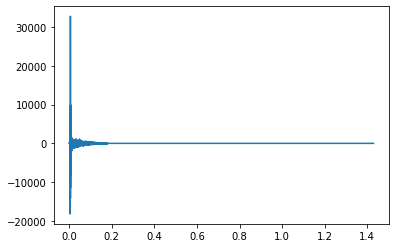

In [85]:
from IPython.lib.display import Audio
import wave

sound_file = wave.open("clap.wav")
framecount = sound_file.getnframes()
width = sound_file.getsampwidth()

fs = sound_file.getframerate()
clap_length_sec = framecount/fs
length_sec = clap_length_sec + maxdepth * delay_per_mm
#Audio(example_sound, rate = fs, autoplay = True)

n = int(fs * length_sec)
t = numpy.linspace(0, length_sec, n)

sound_data = sound_file.readframes(framecount)

example_sound = numpy.frombuffer(sound_data, numpy.int16)

sound_buffer = numpy.zeros(n, numpy.int16)
sound_buffer[0:framecount] = example_sound

plt.plot(t, sound_buffer)
plt.show()

In [34]:
f = numpy.linspace(-fs/2, fs/2, n)

In [94]:
from numpy import fft
sound_fft = fft.fftshift(fft.fft(sound_buffer))

# delays = 1 x w
# f: frequencies 1 x n
# all delayed sound frequencies = n x w
all_delayed_fft = numpy.zeros([n,w], numpy.complex64)

for col in range(w):
    delay = delays[col]
    delayed_fft = sound_fft * numpy.exp(-1j*2*numpy.pi*f*delay)
    all_delayed_fft[:,col] = numpy.transpose(delayed_fft)

delayed_sound_fft = numpy.sum(all_delayed_fft, axis=1)
    
# delayed left sound + right sound = 1xn
delayed_sound = fft.ifft(fft.ifftshift(delayed_sound_fft))

Audio(delayed_sound,rate = fs)